In [1]:
import pandas as pd
import datetime
import seaborn as sns
sns.set_theme()

# importing FinQuant's function to automatically build the portfolio
from finquant.portfolio import build_portfolio

# Definizione portfolio

la somma di tutte le Allocation deve corrispondere a 1 

In [2]:
data = {0: {'Name':'BABA', 'Allocation':0.04},
        1: {'Name':'GOLD', 'Allocation':0.02},
        2: {"Name": "CANG", "Allocation":0.04},
        3: {"Name": "CYBR", "Allocation":0.03},
        4: {"Name": "FB", "Allocation":0.04},
        5: {"Name": "VUZI", "Allocation":0.03},
        6: {"Name": "BTC-USD", "Allocation":0.5},
        7: {"Name": "ETH-USD", "Allocation":0.22},
        8: {"Name": "AMZN", "Allocation": 0.1}
}

In [3]:
start_date = "2016-01-01"
end_date = datetime.date.today()

pf_allocation = pd.DataFrame.from_dict(data, orient="index")
names = pf_allocation["Name"].values.tolist()
names

['BABA', 'GOLD', 'CANG', 'CYBR', 'FB', 'VUZI', 'BTC-USD', 'ETH-USD', 'AMZN']

# Proprietà del portfoglio e sharpe ratio

Lo sharpe ratio rappresenta la media del rapporto rendimento / volatilità di tutti gli asset che compongono il portfolio.

Di conseguenza un portfolio dotato di uno sharpe ratio elevato indica una situazione in cui i potenziali ritorni superano i rischi legati alla volatilità. 

In [4]:
#Inserire i valori del mio portfolio
pf = build_portfolio(
    names=names, pf_allocation=pf_allocation, start_date=start_date, end_date=end_date, data_api="yfinance"
)
pf.properties()

[*********************100%***********************]  9 of 9 completed
----------------------------------------------------------------------
Stocks: BABA, GOLD, CANG, CYBR, FB, VUZI, BTC-USD, ETH-USD, AMZN
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.784
Portfolio Volatility: 0.463
Portfolio Sharpe Ratio: 1.681

Skewness:
       BABA      GOLD     CANG      CYBR       FB      VUZI   BTC-USD  \
0  0.167549  0.919402  1.85938  0.619701  0.65494  0.194133  2.192428   

    ETH-USD      AMZN  
0  1.923655  0.722984  

Kurtosis:
       BABA      GOLD      CANG      CYBR        FB     VUZI   BTC-USD  \
0 -0.387203  0.237759  7.759794 -0.861711 -0.029057  0.08253  7.657322   

    ETH-USD      AMZN  
0  4.550814 -0.225688  

Information:
   Allocation     Name
0        0.04     BABA
1        0.02     GOLD
2        0.04     CANG
3        0.03     CYBR
4        0.04       FB
5        0.03     VUZI
6        0.50  BTC-USD
7        0.22  ETH-USD
8        0.10     AM

/Users/valerio_mellini/Documents/source-code/tutorials/python/02-analisi-quantitative-finanza/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


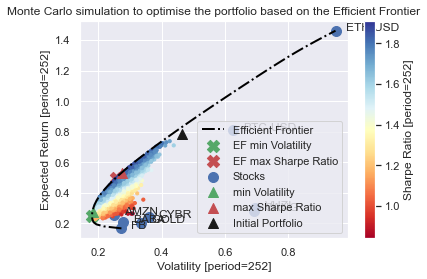

In [6]:
# Monte Carlo optimisation

pf.mc_optimisation(num_trials=10000)

# minimisation to compute efficient frontier and optimal portfolios along it
pf.ef_plot_efrontier()
pf.ef.plot_optimal_portfolios()
# plotting individual stocks
pf.plot_stocks()
pf.mc_plot_results()

In [7]:
from finquant.efficient_frontier import EfficientFrontier

# creating an instance of EfficientFrontier
ef = EfficientFrontier(pf.comp_mean_returns(freq=1), pf.comp_cov())
# optimisation for minimum volatility
print(ef.maximum_sharpe_ratio())

         Allocation
BABA       0.080576
GOLD       0.163462
CANG       0.059215
CYBR       0.092857
FB         0.000000
VUZI       0.014380
BTC-USD    0.122527
ETH-USD    0.153074
AMZN       0.313909


## Proviamo a misurare nuovamente con le ripartizioni suggerite

In [8]:
data = {0: {'Name':'BABA', 'Allocation':0.08},
        1: {'Name':'GOLD', 'Allocation':0.16},
        2: {"Name": "CANG", "Allocation":0.05},
        3: {"Name": "CYBR", "Allocation":0.09},
        4: {"Name": "FB", "Allocation":0.000},
        5: {"Name": "VUZI", "Allocation":0.014},
        6: {"Name": "BTC-USD", "Allocation":0.12},
        7: {"Name": "ETH-USD", "Allocation":0.15},
        8: {"Name": "AMZN", "Allocation":0.31}
}

start_date = "2016-01-01"
end_date = datetime.date.today()

pf_allocation = pd.DataFrame.from_dict(data, orient="index")
names = pf_allocation["Name"].values.tolist()

pf = build_portfolio(
    names=names, pf_allocation=pf_allocation, start_date=start_date, end_date=end_date, data_api="yfinance"
)
pf.properties()

[*********************100%***********************]  9 of 9 completed
----------------------------------------------------------------------
Stocks: BABA, GOLD, CANG, CYBR, FB, VUZI, BTC-USD, ETH-USD, AMZN
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.499
Portfolio Volatility: 0.256
Portfolio Sharpe Ratio: 1.927

Skewness:
       BABA      GOLD     CANG      CYBR       FB      VUZI   BTC-USD  \
0  0.167549  0.919402  1.85938  0.619701  0.65494  0.194133  2.192054   

    ETH-USD      AMZN  
0  1.923491  0.722984  

Kurtosis:
       BABA      GOLD      CANG      CYBR        FB     VUZI   BTC-USD  \
0 -0.387203  0.237759  7.759794 -0.861711 -0.029057  0.08253  7.654353   

    ETH-USD      AMZN  
0  4.549423 -0.225688  

Information:
   Allocation     Name
0       0.080     BABA
1       0.160     GOLD
2       0.050     CANG
3       0.090     CYBR
4       0.000       FB
5       0.014     VUZI
6       0.120  BTC-USD
7       0.150  ETH-USD
8       0.310     AM